<div class="alert alert-block alert-info">
<h2><center><strong> Systeme de recommandation :Content based filtering </strong></center></h2>
        
</div>

Il existe 2 types de système de recommandation :

- un basé sur "Content-based" 

Le système va suggéré des elements similaires à ceux déjà vu

- un basé sur "Collaborative filtering"

Le système va essayer de prédire les préférences d'un utilisateur en se basant sur les préférences d'utilisateur ressemblant.
Il fonctionne en recherchant un grand groupe de personnes et en trouvant un plus petit nombre d'utilisateurs ayant des goûts similaires à ceux d'un utilisateur particulier. Il examine les éléments qu'ils aiment et les combine pour créer une liste classée de suggestions.
-  '+' :
-  '-' : nécessite un grand nombre d'utilisateurs pour fonctionner

- collaborative filtering needs large dataset with active users who rated a product before in order to make accurate predictions.
- content-based filtering can recommend a new item, but needs more data of user preference in order to incorporate best match.

<div class="alert alert-block alert-success">  
<strong>1.1 Import des packages<a id='head-1-2'></a> 📕 📗 📘 📙</strong>
        
</div>

In [1]:
%load_ext pycodestyle_magic

In [2]:
%flake8_on

In [5]:
import pickle
import scipy.sparse as sparse
from module.create_modelConB import ContentBasedModel
from module.getData import getData

<div class="alert alert-block alert-danger">  
<h2><center><strong>2.Data Transformation<a id='head-2'></a></strong></center></h2>
        
</div>

<div class="alert alert-block alert-success">  
<strong>2.1 Chargement du jeu de données<a id='head-1-2'></a> 📕 📗 📘 📙</strong>
        
</div>

In [6]:
dataInfo = getData(interaction_path ="test", article_path="test",articles_embedding_path= "test")
interactions_df,articles_df,matriceArticle = dataInfo.load_data()

ValueError: No objects to concatenate

1:36: E251 unexpected spaces around keyword / parameter equals
1:65: E231 missing whitespace after ','
1:80: E501 line too long (97 > 79 characters)
1:90: E251 unexpected spaces around keyword / parameter equals
2:16: E231 missing whitespace after ','
2:28: E231 missing whitespace after ','


In [3]:
'''
display(interactions_df.head(10))
print(articles_df.shape)
display(articles_df.head())
display(matriceArticle.shape)
#display(interactions_user_df.head(10))
#display(matriceArticle.shape)
'''

'\ndisplay(interactions_df.head(10))\nprint(articles_df.shape)\ndisplay(articles_df.head())\ndisplay(matriceArticle.shape)\n#display(interactions_user_df.head(10))\n#display(matriceArticle.shape)\n'

**On ajout à la matrice embedding :**
- le word count
- la categorie

In [4]:
interactions_df['session_start'] = pd.to_datetime(interactions_df['session_start'], unit='ms')
interactions_df['session_start'] = interactions_df['session_start'].dt.strftime('%d/%m/%Y  %H:%m')
interactions_df['click_timestamp'] = pd.to_datetime(interactions_df['click_timestamp'], unit='ms')
interactions_df['click_timestamp'] = interactions_df['click_timestamp'].dt.strftime('%d/%m/%Y :%H:%m')

In [5]:
articles_df

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162
...,...,...,...,...,...
364042,364042,460,1434034118000,0,144
364043,364043,460,1434148472000,0,463
364044,364044,460,1457974279000,0,177
364045,364045,460,1515964737000,0,126


In [6]:

#interactions_df.drop(['click_environment', 'click_deviceGroup', 'click_os','click_country','click_region','click_referrer_type'], axis=1, inplace=True)
#articles_df.drop(['category_id','publisher_id', 'words_count','created_at_ts'], axis=1, inplace=True)

df = pd.merge(articles_df, interactions_df, left_on = ['article_id'], right_on = ['click_article_id'])
df.sort_values(by=['user_id','session_start'], ascending = True, inplace= True)
df.head(8)

,article_id,category_id,created_at_ts,publisher_id,words_count,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
345313,68866,136,1506816482000,0,226,0,1506825423271737,01/10/2017 02:10,2,68866,01/10/2017 :03:10,4,3,20,1,20,2
986646,157541,281,1506800518000,0,280,0,1506825423271737,01/10/2017 02:10,2,157541,01/10/2017 :03:10,4,3,20,1,20,2
537818,96755,209,1507326628000,0,211,0,1507340000920377,07/10/2017 01:10,2,96755,07/10/2017 :01:10,4,3,20,1,20,2
2682494,313996,431,1507317197000,0,265,0,1507340000920377,07/10/2017 01:10,2,313996,07/10/2017 :01:10,4,3,20,1,20,2
1105887,160158,281,1507352746000,0,145,0,1507385847186982,07/10/2017 14:10,2,160158,07/10/2017 :14:10,4,3,20,1,20,2
1803375,233470,375,1507375559000,0,292,0,1507385847186982,07/10/2017 14:10,2,233470,07/10/2017 :14:10,4,3,20,1,20,2
444518,87205,186,1507497786000,0,137,0,1507514030209212,09/10/2017 01:10,2,87205,09/10/2017 :01:10,4,3,20,1,20,2
451556,87224,186,1507496527000,0,100,0,1507514030209212,09/10/2017 01:10,2,87224,09/10/2017 :01:10,4,3,20,1,20,2


In [7]:
df.drop(['click_article_id','session_start', 'session_size', 'click_timestamp'], axis=1, inplace=True)
df = df[['user_id','article_id','session_id']]
df.head(8)

,user_id,article_id,session_id
345313,0,68866,1506825423271737
986646,0,157541,1506825423271737
537818,0,96755,1507340000920377
2682494,0,313996,1507340000920377
1105887,0,160158,1507385847186982
1803375,0,233470,1507385847186982
444518,0,87205,1507514030209212
451556,0,87224,1507514030209212


In [8]:
df = df.groupby(by=['user_id','article_id'],  as_index = False).agg('count')
df.head(8)

,user_id,article_id,session_id
0,0,68866,1
1,0,87205,1
2,0,87224,1
3,0,96755,1
4,0,157541,1
5,0,160158,1
6,0,233470,1
7,0,313996,1


In [9]:
df.rename(columns={"session_id": "interactionStrength"}, inplace = True)
df.head(10)

,user_id,article_id,interactionStrength
0,0,68866,1
1,0,87205,1
2,0,87224,1
3,0,96755,1
4,0,157541,1
5,0,160158,1
6,0,233470,1
7,0,313996,1
8,1,36162,1
9,1,59758,1


In [10]:
df.sort_values(by=['interactionStrength'], ascending = False)

,user_id,article_id,interactionStrength
349865,16280,68851,33
349924,16280,237071,33
349969,16280,363925,33
349859,16280,43032,31
349853,16280,38823,30
...,...,...,...
992352,54285,97590,1
992353,54285,156447,1
992354,54285,156624,1
992355,54285,158646,1


In [11]:
interactions_df[(interactions_df['user_id']==16280) & (interactions_df['click_article_id']==68851)]

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
45134,16280,1506877411439923,01/10/2017 17:10,10,68851,01/10/2017 :17:10,4,1,17,1,21,7
92584,16280,1506901010131299,01/10/2017 23:10,8,68851,01/10/2017 :23:10,4,1,17,1,21,7
109133,16280,1506907153360776,02/10/2017 01:10,6,68851,02/10/2017 :01:10,4,1,17,1,21,7
192063,16280,1506950022170380,02/10/2017 13:10,9,68851,02/10/2017 :13:10,4,1,17,1,21,7
289128,16280,1506968549114135,02/10/2017 18:10,6,68851,02/10/2017 :18:10,4,1,17,1,21,7
390975,16280,1506986235419727,02/10/2017 23:10,12,68851,02/10/2017 :23:10,4,1,17,1,21,7
544299,16280,1507043618100239,03/10/2017 15:10,11,68851,03/10/2017 :15:10,4,1,17,1,21,7
587856,16280,1507051807415073,03/10/2017 17:10,10,68851,03/10/2017 :17:10,4,1,17,1,21,7
806634,16280,1507137927323064,04/10/2017 17:10,9,68851,04/10/2017 :17:10,4,1,17,1,21,7
842094,16280,1507147662145465,04/10/2017 20:10,7,68851,04/10/2017 :20:10,4,1,17,1,21,7


 <div class="alert alert-block alert-success">  
<strong>2.2 Content Based Model<a id='head-1-2'></a> 📕 📗 📘 📙</strong>
        
</div>

On sauvegarde sous forme pickle :

In [4]:
'''
filename = 'matriceArticle.pkl'
outfile = open(filename,'wb')
pickle.dump(matriceArticle,outfile)
outfile.close()

filename = 'interactions_user.pkl'
outfile = open(filename,'wb')
pickle.dump(interactions_user_df,outfile)
outfile.close()
'''

"\nfilename = 'matriceArticle.pkl'\noutfile = open(filename,'wb')\npickle.dump(matriceArticle,outfile)\noutfile.close()\n\nfilename = 'interactions_user.pkl'\noutfile = open(filename,'wb')\npickle.dump(interactions_user_df,outfile)\noutfile.close()\n"

#### selecting 5 closest articles using cosin distance

In [12]:
cfModel = ContentBasedModel()
recommendations = cfModel.getFiveArticles(10)

D:\formations\Anaconda\envs\P9_Anne_Menard\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


In [14]:
recommendations

[199064, 199867, 198845, 198892, 198901]

 <div class="alert alert-block alert-success">  
<strong>2.3 Colaborative Based Model<a id='head-1-2'></a> 📕 📗 📘 📙</strong>
        
</div>

In most cases, the cells in the matrix are empty, as users only rate a few items. It’s highly unlikely for every user to rate or react to every item available. A matrix with mostly empty cells is called sparse, and the opposite to that (a mostly filled matrix) is called dense.

- How do you determine which users or items are similar to one another?
- Given that you know which users are similar, how do you determine the rating that a user would give to an item based on the ratings of similar users?
- How do you measure the accuracy of the ratings you calculate?

One important thing to keep in mind is that in an approach based purely on collaborative filtering, the similarity is not calculated using factors like the age of users, genre of the movie, or any other data about users or items. It is calculated only on the basis of the rating (explicit or implicit) a user gives to an item. For example, two users can be considered similar if they give the same ratings to ten movies despite there being a big difference in their age.

One of the approaches to measure the accuracy of your result is the Root Mean Square Error (RMSE), in which you predict ratings for a test dataset of user-item pairs whose rating values are already known. The difference between the known value and the predicted value would be the error. Square all the error values for the test set, find the average (or mean), and then take the square root of that average to get the RMS

Another metric to measure the accuracy is Mean Absolute Error (MAE), in which you find the magnitude of error by finding its absolute value and then taking the average of all error values.

https://towardsdatascience.com/factorization-machines-for-item-recommendation-with-implicit-feedback-data-5655a7c749db

Many times there are no explicit ratings or preferences given by users, that is, the interactions are usually implicit. For example, a user may puchase something on a website, click an item on a mobile app, or order food from a restaurant. This information may reflect users' preference towards the items in an implicit manner.

As follows, a data set is created to illustrate the implicit feedback scenario.

In the data,
There are 3 users whose IDs are 1, 2, 3.
There are 3 items whose IDs are 1, 2, 3.
There are no ratings or explicit feedback given by the users.

### Item based filtered

Nous n'avons pas d'informations sur les utilisateurs, par contre nous en avons sur les articles et les interactions des utilisateurs avec les articles donc nous tuilisaerons un modèle basé sur les similarités entre les articles

item-based filtering will look at similarities between the items and not the users. We have that User C likes watermelon and most people that like watermelon, also like grape, thus we recommend grape to User C.

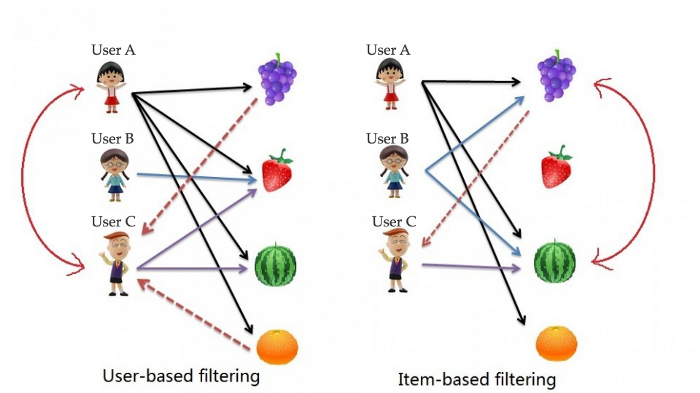

In [39]:
sparse_item_user = sparse.csr_matrix((df['interactionStrength'].astype(float), (df['article_id'], df['user_id'])))
sparse_user_item = sparse.csr_matrix((df['interactionStrength'].astype(float), (df['user_id'], df['article_id'])))

In [40]:
import implicit
#Building the model
modelCF = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=20)
alpha_val = 40
data_conf = (sparse_item_user * alpha_val).astype('double')
modelCF.fit(data_conf)

  0%|          | 0/20 [00:00<?, ?it/s]

In [41]:
'''
# Save the Modle to file in the current working directory
Pkl_Filename = "modelCF.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(modelCF, file)
'''

'\n# Save the Modle to file in the current working directory\nPkl_Filename = "modelCF.pkl"  \n\nwith open(Pkl_Filename, \'wb\') as file:  \n    pickle.dump(modelCF, file)\n'

In [42]:
# Create recommendations for person with id 50
person_id = 99
recommendations = modelCF.recommend(person_id, sparse_user_item,N=5,filter_already_liked_items=True)

In [43]:
data = []
for i,j in recommendations :
    data.append(i)
data

[336220, 289090, 124748, 124177, 124749]

In [44]:
'''
filename = 'modelCF.pkl'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()

filename = 'sprMatriceUser.pkl'
outfile = open(filename,'wb')
pickle.dump(sparse_person_content,outfile)
outfile.close()
'''

"\nfilename = 'modelCF.pkl'\noutfile = open(filename,'wb')\npickle.dump(model,outfile)\noutfile.close()\n\nfilename = 'sprMatriceUser.pkl'\noutfile = open(filename,'wb')\npickle.dump(sparse_person_content,outfile)\noutfile.close()\n"

In [45]:
#Get similar items
item_id = 7
n_similar = 3
similar = modelCF.similar_items(item_id, n_similar)
print(similar)

[(121351, 0.0), (121350, 0.0), (364046, 0.0)]
